Importing Required Packages

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn. metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
import seaborn as sns 
import time

# Analysis of Data

In [ ]:
path = "/work/breast-cancer.csv"
df = pd.read_csv(path)
# df

In [ ]:

# # Extract predictor variable names (excluding the "diagnosis" column)
# predictor_variables = df.columns[df.columns != 'diagnosis']

# # Print the predictor variable names
# print("Predictor Variables:")
# for variable in predictor_variables:
#     print(variable)
# len(predictor_variables)

In [ ]:
# df.hist(bins=100, figsize=(20,20))
# plt.show()

In [ ]:
#label Encoding - Handling Categorical Data
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [ ]:
# #Correlation Analysis 
# correlation = df.corr()
# correlation_with_target = correlation['diagnosis'].abs().sort_values(ascending=False)
# top_features = correlation_with_target.nlargest(11)[1:]
# print(correlation_with_target)
# print("Top Features !!!")
# print(top_features)

In [ ]:
X = df.drop('diagnosis', axis=1) #Extracting features X
y = df['diagnosis'] #Target y 
len(y)

569

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(455, 31)
(114, 31)


In [ ]:
# Fit the scaler on the training data and transform both training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## MODELS

# Logistic Regression

### Model before hyperparameter tuning

In [ ]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test_scaled)

# Calculate the accuracy 
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9736842105263158

### Hyperparameter Tuning

Working on Logistic Regression...
Best hyperparameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


Accuracy on test set: 0.9912


Confusion Matrix:
[[71  0]
 [ 1 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



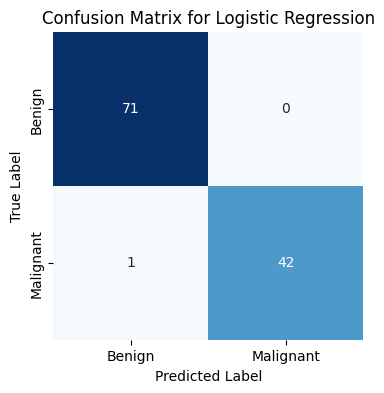

In [ ]:
# Define hyperparameters to tune for each model
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


# Create a dictionary of models
models = {
    'Logistic Regression': (LogisticRegression(), param_grid_lr)
}

# Visualize the performance for each model
for model_name, (model, param_grid) in models.items():
    print(f"Working on {model_name}...")
    
    # Create a pipeline 
    pipeline = model

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    # Print the best hyperparameters
    print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")
    print('\n')

    # Evaluate the model on the test set
    y_pred = grid_search.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print(f"Accuracy on test set: {accuracy:.4f}")
    print('\n')
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{classification_rep}")

    # Plot confusion matrix with annotations using seaborn
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

## Visualising GridSearch 

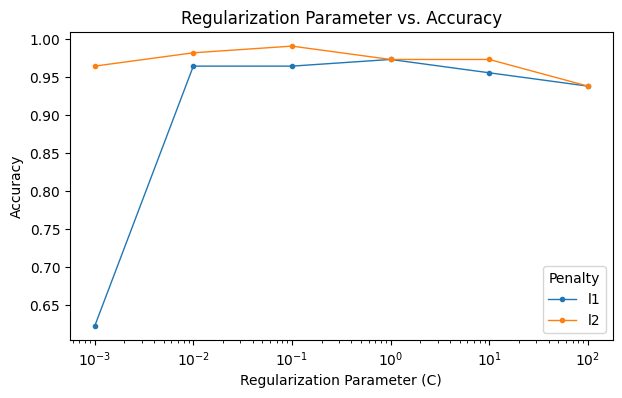

0.9912280701754386


In [ ]:
# Define values for the regularization parameter (C) and penalty terms
reg_params = [0.001, 0.01, 0.1, 1, 10, 100]
penalties = ['l1', 'l2']

# Store accuracy scores for each combination of regularization parameter and penalty
accuracy_scores = np.zeros((len(reg_params), len(penalties)))

# Iterate through regularization parameters and penalties
for i, reg_param in enumerate(reg_params):
    for j, penalty in enumerate(penalties):
        # Create and fit the logistic regression model with the current parameters
        logreg_model = LogisticRegression(C=reg_param, penalty=penalty, solver='liblinear')
        logreg_model.fit(X_train_scaled, y_train)

        # Make predictions on the test set
        y_pred = logreg_model.predict(X_test_scaled)

        # Calculate and store the accuracy score
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[i, j] = accuracy

# Plot the results
fig, ax = plt.subplots(figsize=(7, 4))

for j, penalty in enumerate(penalties):
    ax.plot(reg_params, accuracy_scores[:, j], label=f'{penalty}',lw=1,marker='.')

ax.set_xscale('log')
ax.set_xlabel('Regularization Parameter (C)')
ax.set_ylabel('Accuracy')
ax.set_title('Regularization Parameter vs. Accuracy')
ax.legend(title='Penalty')
plt.show()
print(accuracy_scores.max())

# SVM

### Before hyperparameter tuning

In [ ]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Calculate the accuracy 
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9824561403508771

### 
After hyperparameter tuning

Working on SVM...
Best hyperparameters for SVM: {'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}
Accuracy on test set: 0.9825


Confusion Matrix:
[[71  0]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



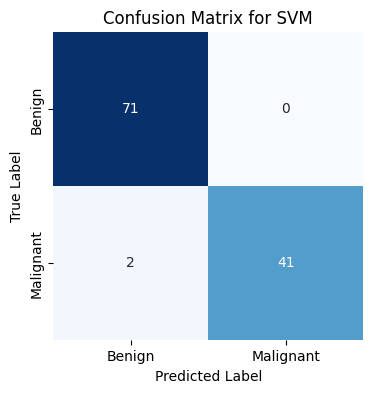

In [ ]:
# Define hyperparameters to tune for each model
param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10],
                  'gamma': [0.001, 0.01, 0.1, 1],
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}


# Create a dictionary of models
models = {'SVM': (SVC(), param_grid_svm)}

# Visualize the performance for each model
for model_name, (model, param_grid) in models.items():
    print(f"Working on {model_name}...")
    
    # Create a pipeline 
    pipeline = model

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    # Print the best hyperparameters
    print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")

    # Evaluate the model on the test set
    y_pred = grid_search.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print(f"Accuracy on test set: {accuracy:.4f}")
    print('\n')
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{classification_rep}")

    # Plot confusion matrix with annotations using seaborn
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

## Visualising GridSearch 

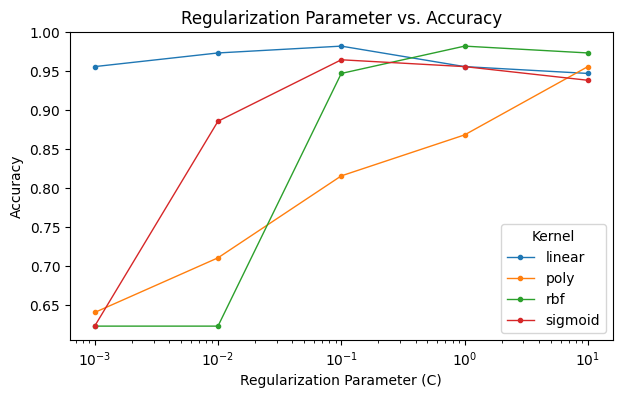

0.9824561403508771


In [ ]:
# Define values for the regularization parameter (C) and penalty terms
reg_params = [0.001, 0.01, 0.1, 1, 10]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Store accuracy scores for each combination of regularization parameter and penalty
accuracy_scores = np.zeros((len(reg_params), len(kernels)))

# Iterate through regularization parameters and penalties
for i, reg_param in enumerate(reg_params):
    for j, kernel in enumerate(kernels):
        # Create and fit the logistic regression model with the current parameters
        svm_model = SVC(C=reg_param, kernel=kernel)
        svm_model.fit(X_train_scaled, y_train)

        # Make predictions on the test set
        y_pred = svm_model.predict(X_test_scaled)

        # Calculate and store the accuracy score
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[i, j] = accuracy

# Plot the results
fig, ax = plt.subplots(figsize=(7, 4))

for j, kernel in enumerate(kernels):
    ax.plot(reg_params, accuracy_scores[:, j], label=f'{kernel}',lw=1,marker='.')

ax.set_xscale('log')
ax.set_xlabel('Regularization Parameter (C)')
ax.set_ylabel('Accuracy')
ax.set_title('Regularization Parameter vs. Accuracy')
ax.legend(title='Kernel')
plt.show()
print(accuracy_scores.max())

# KNN

### Before Hyperparameter Tuning

In [ ]:
# Create and train the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Accuracy on the test set: 0.9473684210526315


### After Hyperparameter Tuning 

Working on KNN...
Best hyperparameters for KNN: {'metric': 'euclidean', 'n_neighbors': 5}
Accuracy on test set: 0.9474


Confusion Matrix:
[[68  3]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



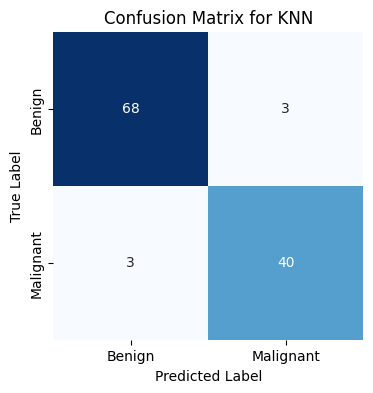

In [ ]:
# Define hyperparameters to tune for each model
param_grid_knn = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                  'metric': ['manhattan', 'euclidean']
}


# Create a dictionary of models
models = {'KNN': (KNeighborsClassifier(), param_grid_knn)}

# Visualize the performance for each model
for model_name, (model, param_grid) in models.items():
    print(f"Working on {model_name}...")
    
    # Create a pipeline 
    pipeline = model

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    # Print the best hyperparameters
    print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")

    # Evaluate the model on the test set
    y_pred = grid_search.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print(f"Accuracy on test set: {accuracy:.4f}")
    print('\n')
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{classification_rep}")

    # Plot confusion matrix with annotations using seaborn
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

### Visualising GridSearchCV

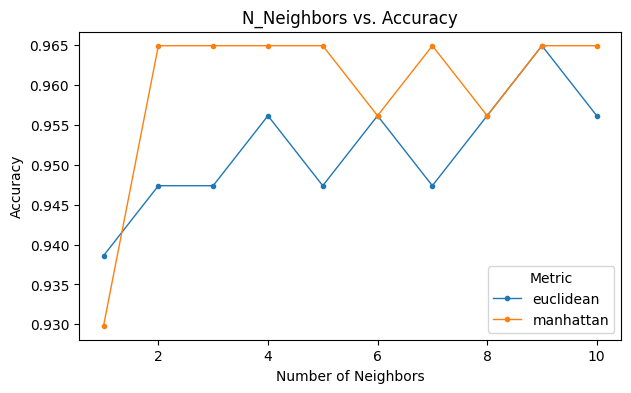

0.9649122807017544


In [ ]:
# Define values for the regularization parameter (C) and penalty terms
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
metrics = ['euclidean', 'manhattan']

# Store accuracy scores for each combination of regularization parameter and penalty
accuracy_scores = np.zeros((len(n_neighbors), len(metrics)))

# Iterate through regularization parameters and penalties
for i, n_neighbor in enumerate(n_neighbors):
    for j, metric in enumerate(metrics):
        # Create and fit the logistic regression model with the current parameters
        knn_model = KNeighborsClassifier(n_neighbors=n_neighbor, metric=metric)
        knn_model.fit(X_train_scaled, y_train)

        # Make predictions on the test set
        y_pred = knn_model.predict(X_test_scaled)

        # Calculate and store the accuracy score
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[i, j] = accuracy

# Plot the results
fig, ax = plt.subplots(figsize=(7, 4))

for j, metric in enumerate(metrics):
    ax.plot(n_neighbors, accuracy_scores[:, j], label=f'{metric}',lw=1,marker='.')

ax.set_xlabel('Number of Neighbors')
ax.set_ylabel('Accuracy')
ax.set_title('N_Neighbors vs. Accuracy')
ax.legend(title='Metric')
plt.show()
print(accuracy_scores.max())

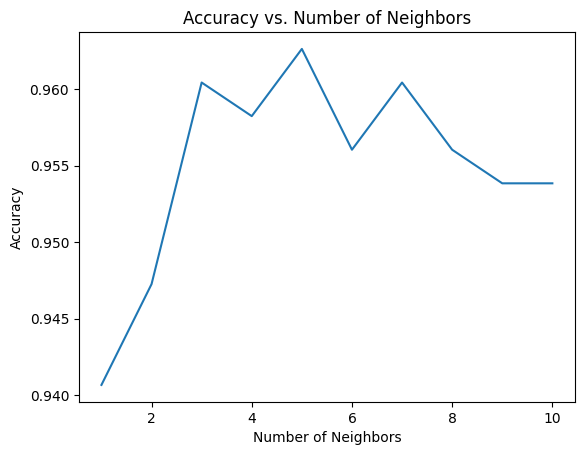

In [ ]:
# Define separate GridSearchCVs for each hyperparameter
grid_search_n_neighbors = GridSearchCV(knn_model, {"n_neighbors": range(1, 11)}, scoring="accuracy")
grid_search_metric = GridSearchCV(knn_model, {"metric": ["euclidean", "manhattan"]}, scoring="accuracy")

# Fit each GridSearchCV
grid_search_n_neighbors.fit(X_train_scaled, y_train)
grid_search_metric.fit(X_train_scaled, y_train)

# Record best scores and corresponding parameter values
n_neighbors_best_score = grid_search_n_neighbors.best_score_
n_neighbors_best_param = grid_search_n_neighbors.best_params_

metric_best_score = grid_search_metric.best_score_
metric_best_param = grid_search_metric.best_params_

# Plot accuracy vs. n_neighbors
n_neighbors = [i for i in range(1, 11)]
n_neigh_best_scores = [grid_search_n_neighbors.cv_results_["mean_test_score"][i] for i in range(len(n_neighbors))]
plt.plot(n_neighbors, n_neigh_best_scores)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Neighbors")
plt.show()

# # Plot accuracy vs. metric
# metrics = ["Euclidean", "Manhattan"]
# metric_best_scores = [metric_best_score if m == metric_best_param else 0 for m in metrics]
# plt.bar(metrics, metric_best_scores)
# plt.xlabel("Metric")
# plt.ylabel("Accuracy")
# plt.title("Accuracy vs. Metric")
# plt.show()

Best metric: manhattan
Best number of neighbors: 1


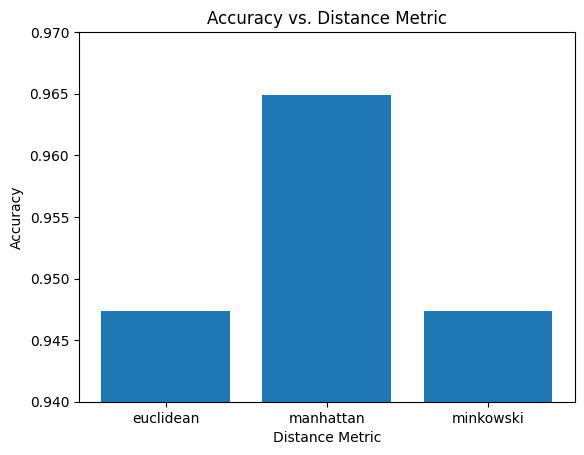

In [ ]:
# Import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Define the list of distance metrics
distance_metrics = ["euclidean", "manhattan", "minkowski"]

# Define the KNN model
knn_model = KNeighborsClassifier()

# Define parameter grid
param_grid = {"n_neighbors": range(1, 21), "metric": distance_metrics}

# Create GridSearchCV object
grid_search = GridSearchCV(knn_model, param_grid, scoring="accuracy")

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Obtain best hyperparameters
best_params = grid_search.best_params_

# Extract best metric and number of neighbors
best_metric = best_params["metric"]
best_n_neighbors = best_params["n_neighbors"]

# Print the best hyperparameters
print(f"Best metric: {best_metric}")
print(f"Best number of neighbors: {best_n_neighbors}")

# Prepare lists for metric and accuracy
metric_accuracy = []

# Iterate through each distance metric
for metric in distance_metrics:
    # Set the current metric for the KNN model
    knn_model.set_params(metric=metric)

    # Fit the model with the current metric
    knn_model.fit(X_train_scaled, y_train)

    # Predict on the test data
    y_pred = knn_model.predict(X_test_scaled)

    # Calculate and store the accuracy for this metric
    metric_accuracy.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs. distance metric
plt.bar(distance_metrics, metric_accuracy)
plt.xlabel("Distance Metric")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Distance Metric")
plt.ylim(0.94,0.97)
plt.show()


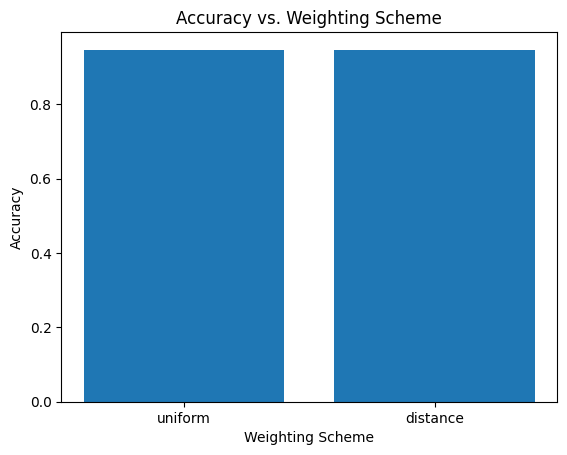

In [ ]:
# Import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the list of weighting schemes
weighting_schemes = ["uniform", "distance"]

# Define the KNN model
knn_model = KNeighborsClassifier()

# Define parameter grid
param_grid = {"n_neighbors": range(1, 21), "weights": weighting_schemes}

# Prepare lists for weights and accuracy
weight_accuracy = []

# Iterate through each weighting scheme
for weight_scheme in weighting_schemes:
    # Set the current weight scheme for the KNN model
    knn_model.set_params(weights=weight_scheme)

    # Fit the model with the current weighting scheme
    knn_model.fit(X_train_scaled, y_train)

    # Predict on the test data
    y_pred = knn_model.predict(X_test_scaled)

    # Calculate and store the accuracy for this weighting scheme
    weight_accuracy.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs. weighting scheme
plt.bar(weighting_schemes, weight_accuracy)
plt.xlabel("Weighting Scheme")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Weighting Scheme")
plt.show()


# Random Forest

### Before Hyperparameter Tuning

In [ ]:
# Create and train the KNN model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)


Accuracy on the test set: 0.956140350877193


### After Hyperparameter Tuning 

Working on Random Forest...
Best hyperparameters for Random Forest: {'max_depth': 5, 'n_estimators': 100}
Accuracy on test set: 0.9649


Confusion Matrix:
[[70  1]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



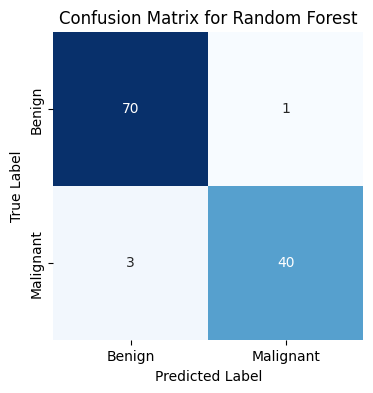

In [ ]:
# Define hyperparameters to tune for each model
param_grid_rf = {'n_estimators': [10, 20, 30, 50, 100],
                 'max_depth': [1, 2, 3, 4, 5]}


# Create a dictionary of models
models = {'Random Forest': (RandomForestClassifier(), param_grid_rf)}

# Visualize the performance for each model
for model_name, (model, param_grid) in models.items():
    print(f"Working on {model_name}...")
    
    # Create a pipeline 
    pipeline = model

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    # Print the best hyperparameters
    print(f"Best hyperparameters for {model_name}: {grid_search.best_params_}")

    # Evaluate the model on the test set
    y_pred = grid_search.predict(X_test_scaled)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    print(f"Accuracy on test set: {accuracy:.4f}")
    print('\n')
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{classification_rep}")

    # Plot confusion matrix with annotations using seaborn
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

### Visualising GridSearchCV

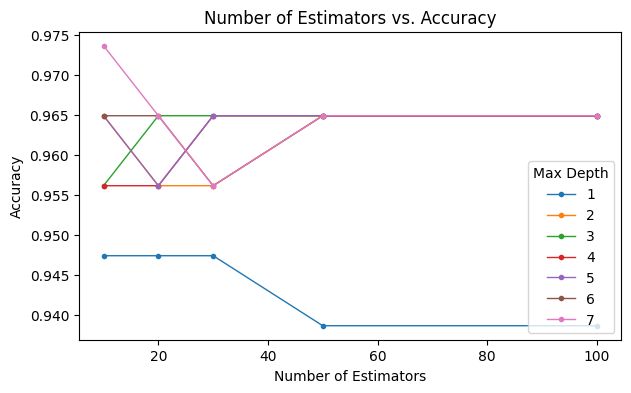

0.9736842105263158


In [ ]:
# Define values for the regularization parameter (C) and penalty terms
n_estimators = [10, 20, 30, 50, 100]
max_depths = [1, 2, 3, 4, 5, 6, 7]

# Store accuracy scores for each combination of regularization parameter and penalty
accuracy_scores = np.zeros((len(n_estimators), len(max_depths)))

# Iterate through regularization parameters and penalties
for i, n_estimator in enumerate(n_estimators):
    for j, max_depth in enumerate(max_depths):
        # Create and fit the logistic regression model with the current parameters
        rf_model = RandomForestClassifier(n_estimators=n_estimator, max_depth=max_depth)
        rf_model.fit(X_train_scaled, y_train)

        # Make predictions on the test set
        y_pred = rf_model.predict(X_test_scaled)

        # Calculate and store the accuracy score
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[i, j] = accuracy

# Plot the results
fig, ax = plt.subplots(figsize=(7, 4))

for j, max_depth in enumerate(max_depths):
    ax.plot(n_estimators, accuracy_scores[:, j], label=f'{max_depth}',lw=1,marker='.')

ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Accuracy')
ax.set_title('Number of Estimators vs. Accuracy')
ax.legend(title='Max Depth')
plt.show()
print(accuracy_scores.max())

In [ ]:
# Build and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy}")


Accuracy on the test set: 0.9649122807017544


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators':[10, 20, 30, 50 ,100],
     'max_depth' : [1, 2, 3, 4, 5, 6, 7]
}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_rf_model.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best hyperparameters: {accuracy_best}")


Best Hyperparameters: {'max_depth': 6, 'n_estimators': 50}
Accuracy with best hyperparameters: 0.9649122807017544


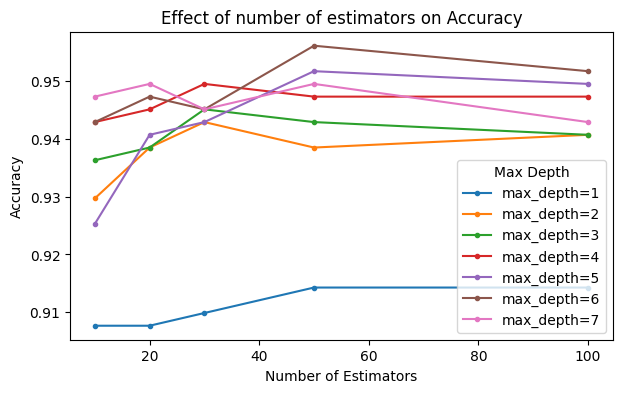

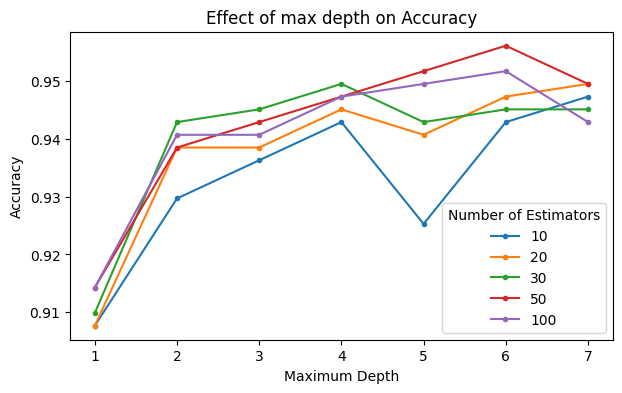

In [ ]:
# Extract the results from the grid search
results = grid_search.cv_results_

# Reshape mean_test_score to match the hyperparameter grid
mean_test_score_matrix = results['mean_test_score'].reshape(len(param_grid['max_depth']), len(param_grid['n_estimators']))

# Plotting the effect of 'n_estimators' on accuracy
plt.figure(figsize=(7, 4))
for i, max_depth in enumerate(param_grid['max_depth']):
    plt.plot(param_grid['n_estimators'], mean_test_score_matrix[i, :], marker='.', label=f'{max_depth}')

plt.title('Effect of number of estimators on Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend(title='Max Depth')
plt.show()

# Plotting the effect of 'max_depth' on accuracy
plt.figure(figsize=(7, 4))
for i, n_estimators in enumerate(param_grid['n_estimators']):
    plt.plot(param_grid['max_depth'], mean_test_score_matrix[:, i], marker='.', label=f'{n_estimators}')

plt.title('Effect of max depth on Accuracy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.legend(title='Number of Estimators')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b4fd4adb-67e6-4e27-a11b-f02b7c7d5af6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>